In [134]:
import pandas as pd
import numpy as np

In [86]:
df=pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [47]:
df.shape

(520, 17)

# 1.Data PreProcessing

In [48]:
#replacing the string values in number format
df2=pd.get_dummies(df,drop_first=True)
df2

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [51]:
#checking for missing values
df2.isnull().sum()

Age                       0
Gender_Male               0
Polyuria_Yes              0
Polydipsia_Yes            0
sudden weight loss_Yes    0
weakness_Yes              0
Polyphagia_Yes            0
Genital thrush_Yes        0
visual blurring_Yes       0
Itching_Yes               0
Irritability_Yes          0
delayed healing_Yes       0
partial paresis_Yes       0
muscle stiffness_Yes      0
Alopecia_Yes              0
Obesity_Yes               0
class_Positive            0
dtype: int64

# 2.Data Visualizations

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender_Male', ylabel='count'>

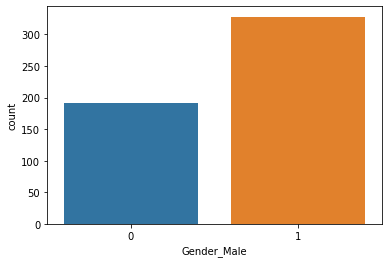

In [53]:
sns.countplot(df2["Gender_Male"])

###### now lower casing the column name for our convenience

In [157]:
df2.columns=df2.columns.str.lower()
df2[df2["class_positive"]==0]

,age,is_male,polyuria_yes,polydipsia_yes,sudden weight loss_yes,weakness_yes,polyphagia_yes,genital thrush_yes,visual blurring_yes,itching_yes,irritability_yes,delayed healing_yes,partial paresis_yes,muscle stiffness_yes,alopecia_yes,obesity_yes,class_positive
200,40,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0
201,28,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
202,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
203,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,67,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
511,66,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
512,43,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

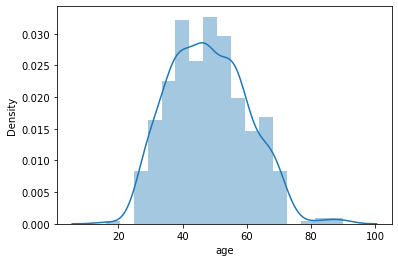

In [55]:
sns.distplot(df2["age"])

In [58]:
rename_column={'gender_male':'is_male'}
df2=df2.rename(columns=rename_column)


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


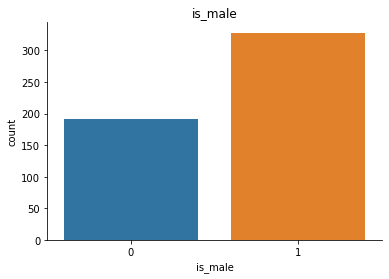

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


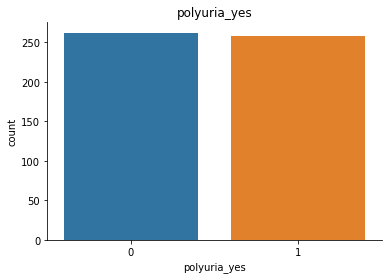

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


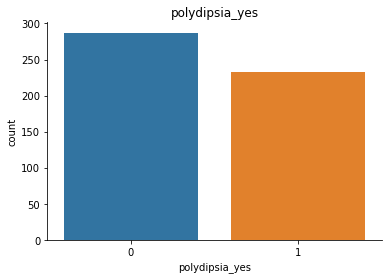

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


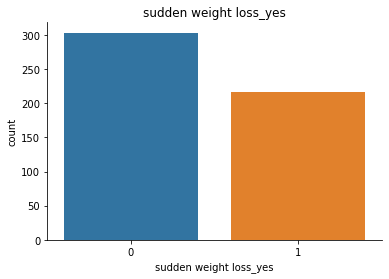

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


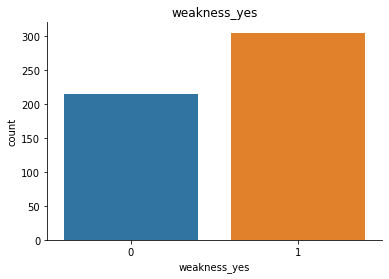

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


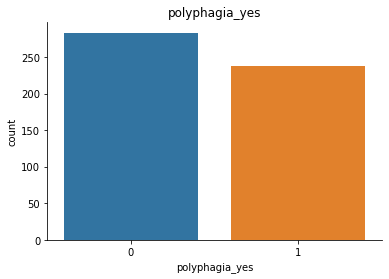

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


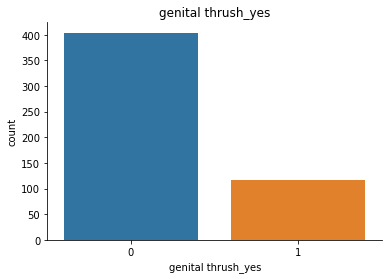

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


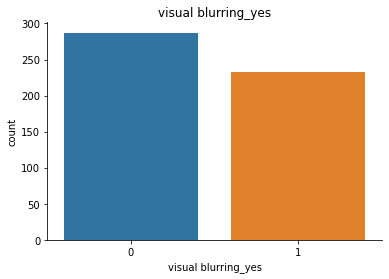

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


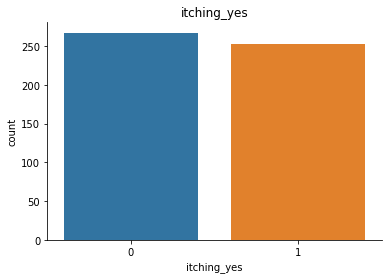

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


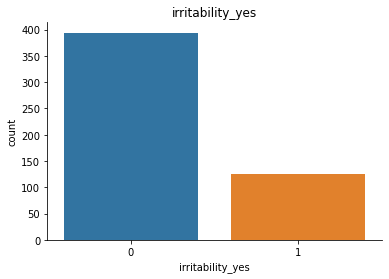

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


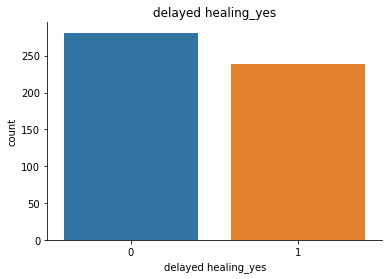

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


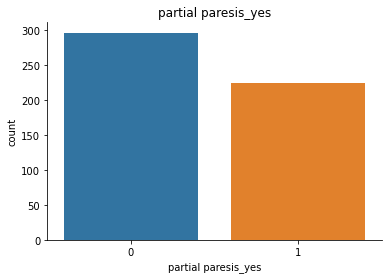

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


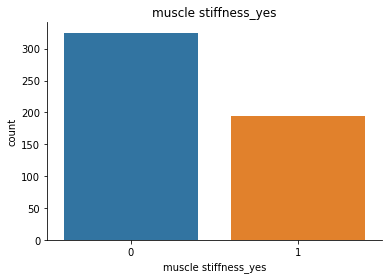

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


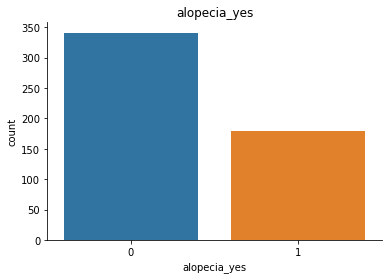

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


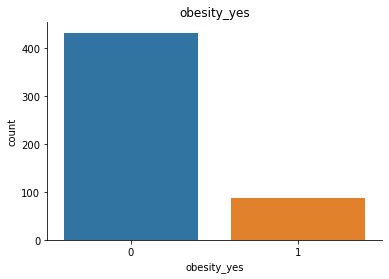

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


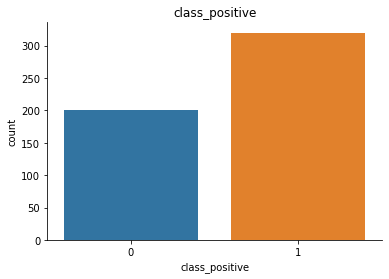

In [59]:
columns=df2.keys()
for column in columns[1:]:
    sns.countplot(df2[column])
    plt.title(column)
    sns.despine()
    plt.show()
    

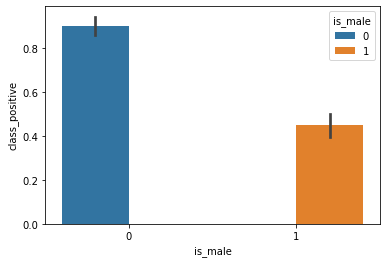

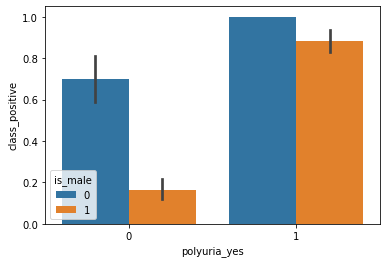

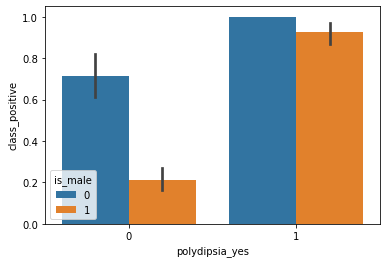

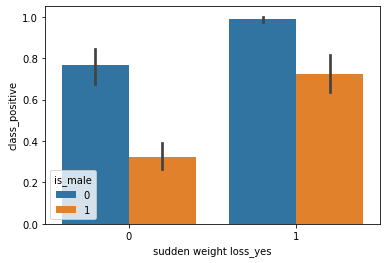

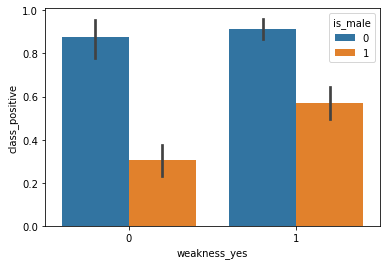

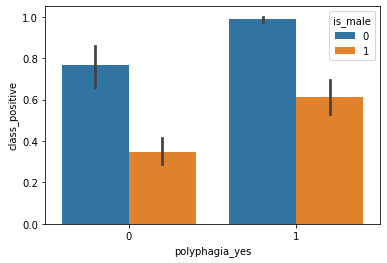

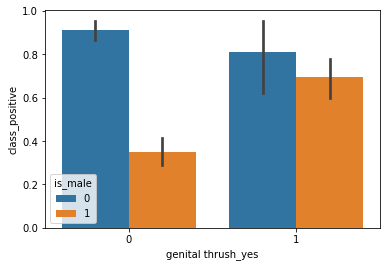

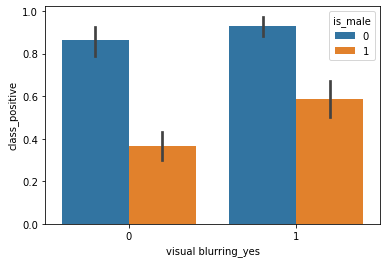

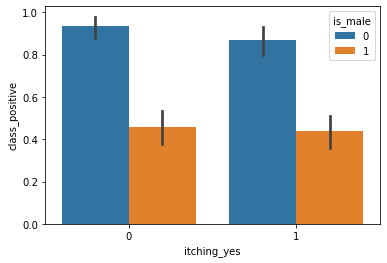

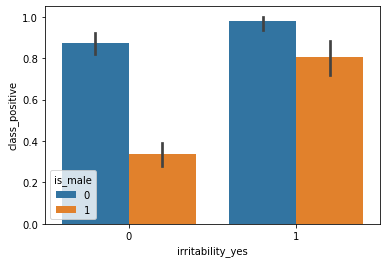

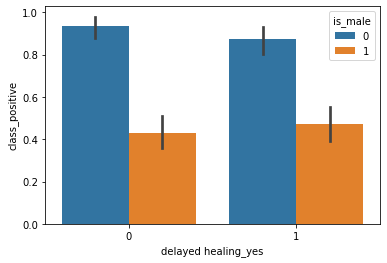

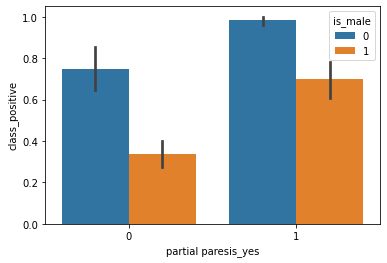

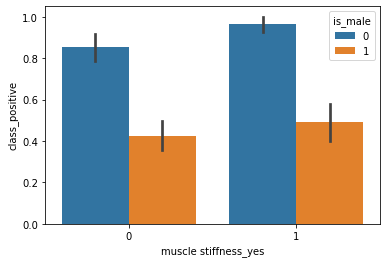

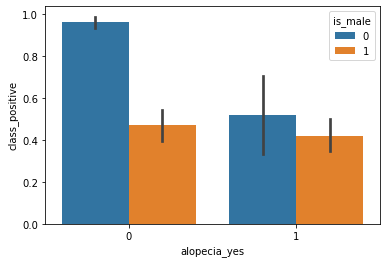

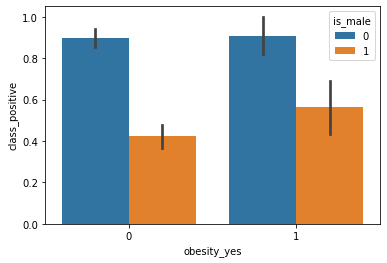

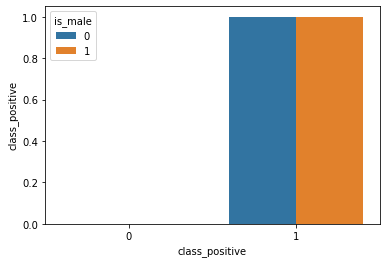

In [62]:
for column in columns[1:]:
    
  
    
    sns.barplot(x=column,y='class_positive',data=df2,hue='is_male')
    plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


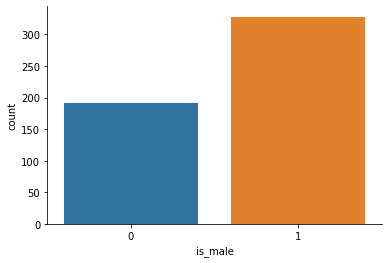

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


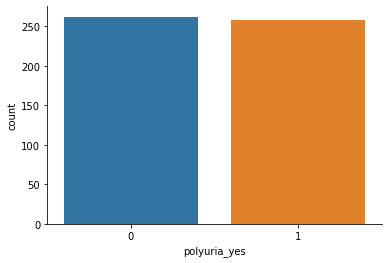

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


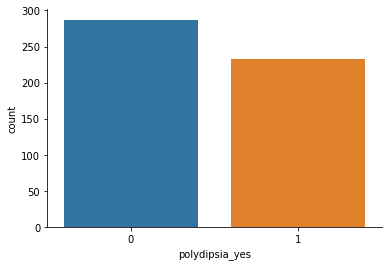

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


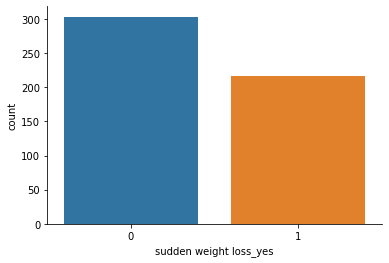

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


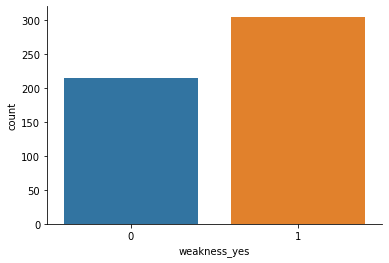

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


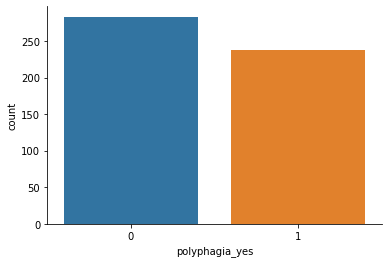

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


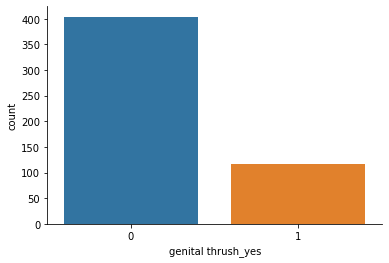

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


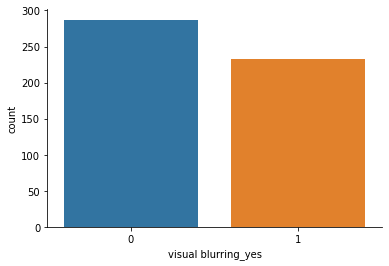

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


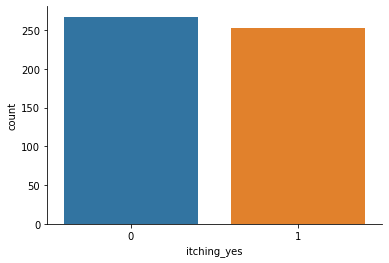

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


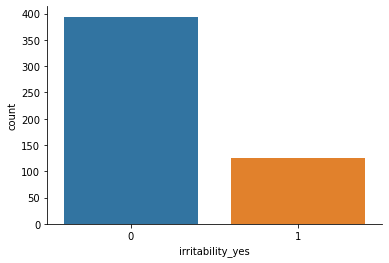

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


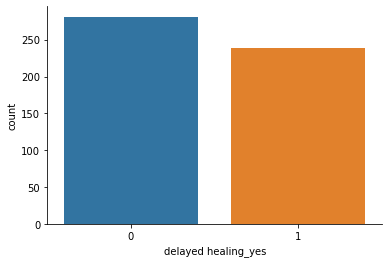

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


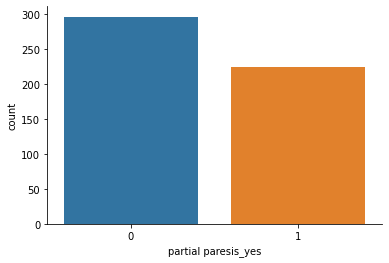

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


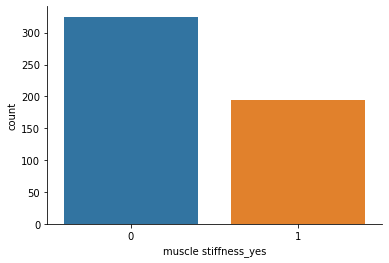

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


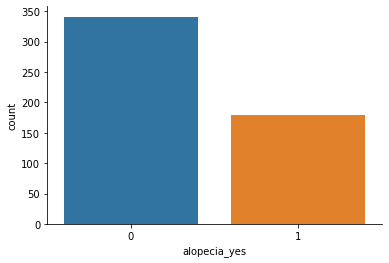

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


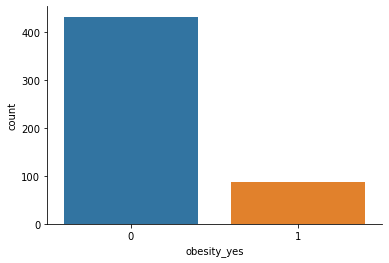

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


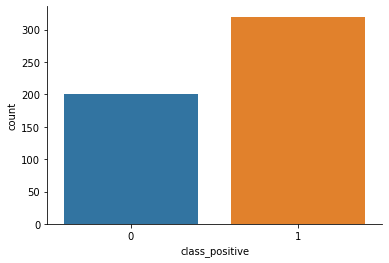

In [66]:
for column in columns[1:]:
    sns.countplot(df2[column])
    sns.despine()
    plt.show()

# Contingency Table

In [76]:
# checking whether obesity is realted to diabetes or not using crosstab
contigency_table=pd.crosstab(df['Obesity'],df['class'])
contigency_table

class,Negative,Positive
Obesity,,
No,173,259
Yes,27,61


<AxesSubplot:xlabel='class', ylabel='Obesity'>

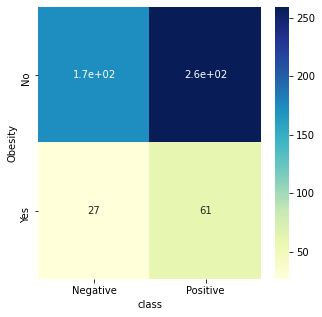

In [78]:
plt.figure(figsize=(5,5)) 
sns.heatmap(contigency_table, annot=True, cmap="YlGnBu")


In [73]:
# getting values in percentage
pd.crosstab(df['Obesity'],df['class'],normalize='all')

class,Negative,Positive
Obesity,,
No,0.332692,0.498077
Yes,0.051923,0.117308


# Chi Square test

In [81]:
chi_stats, p_value, degree_of_freedom, expected =chi2_contingency(contigency_table)
p_value

0.12710799319896815

###### -as p-value(0.12) is greater than 0.05 which means that we "DO NOT REJECT" the null hypothesis 
###### -and p-value(0.12) greater indicates we there is "NO RELATIONSHIP" between person having obesity is also a diabetes patient


In [82]:
# checking whether gender is realted to diabetes or not using crosstab
gender_contigency_table=pd.crosstab(df['Gender'],df['class'])

gender_contigency_table

class,Negative,Positive
Gender,,
Female,19,173
Male,181,147


<AxesSubplot:xlabel='class', ylabel='Gender'>

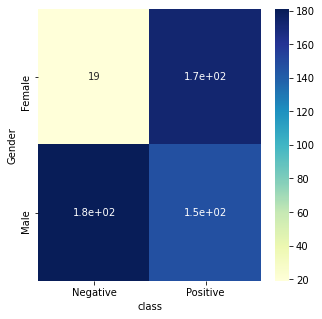

In [83]:
plt.figure(figsize=(5,5)) 
sns.heatmap(gender_contigency_table, annot=True, cmap="YlGnBu")


In [84]:
chi_stats, p_value, degree_of_freedom, expected =chi2_contingency(gender_contigency_table)
p_value

3.289703730553294e-24

##### -as p-value(3.2 e^-24) is less than 0.05 which means that "WE REJECT" the null hypothesis¶
##### -and p-value(3.2 e^-24) less indicates we there is definitely a "RELATIONSHIP" between gender and diabetes patient

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='Age'>

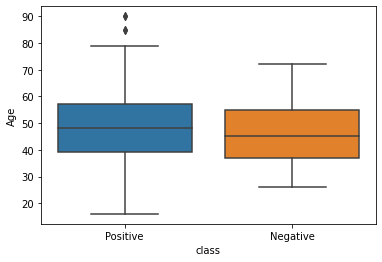

In [85]:
# is there relationship between age and diabetes status?
sns.boxplot(df['class'],df['Age'])

- median line is slighltly higher for positive patients then negative patients

In [89]:
no_diabetes=df[df['class']=='Negative']
no_diabetes.head(4)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
200,40,Male,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Negative
201,28,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative
202,37,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
203,34,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [90]:
# age of no diabetes patient
no_diabetes['Age'].mean()

46.36

In [91]:
diabetes=df[df['class']=='Positive']
diabetes.head(4)
diabetes['Age'].mean()

49.071875

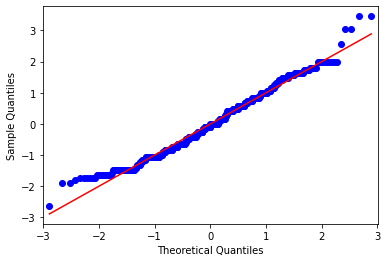

In [93]:
##qq plot allows you to access whether the quantity is normal 
qqplot(df['Age'],fit=True,line="s")
plt.show()

-Our distribution is normal because most our points fall between 45 degree angle , but it seems like it is slighlty skewed at the end but most points on Age is normally distributed so we can use statistical test that suit normally distributed data which is in our case is z-test

In [96]:
### z-test of difference
from statsmodels.stats.weightstats import ztest
z_score,p_value=ztest(diabetes['Age'],no_diabetes['Age'])
z_score,p_value

(2.4882300316303065, 0.012838066562901769)

#### s p-value(0.012) is less than 0.05 which means that "WE REJECT" the null hypothesis
##### so there is somekind of relationship b/w age and diabetes patient

In [99]:
## Correlation Plot

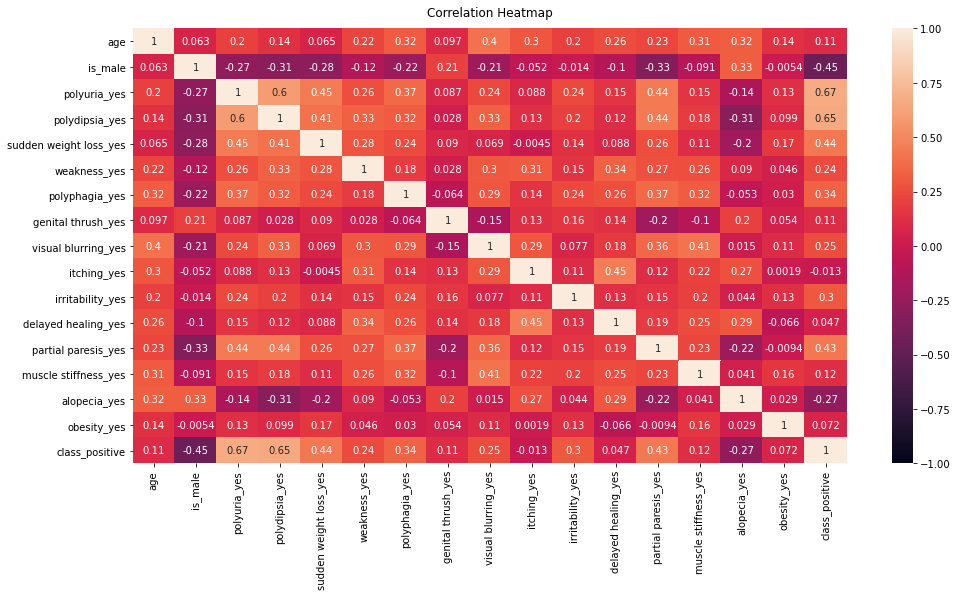

In [106]:
plt.figure(figsize=(16, 8))
heatmap=sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# 3.Model Training

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [117]:
X=df2.drop('class_positive',axis=1)
y=df2["class_positive"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51,stratify=y)

### Dummy Classifier

In [121]:
dummy=DummyClassifier()

In [122]:
dummy.fit(X_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

In [123]:
dummy_pred=dummy.predict(X_test)

In [125]:
cm=confusion_matrix(y_test,dummy_pred)
cm

array([[18, 22],
       [22, 42]], dtype=int64)

<AxesSubplot:>

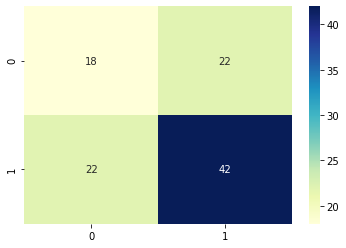

In [126]:
sns.heatmap(cm, annot=True, cmap="YlGnBu")

### DecisionTreeClassifier

In [118]:
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

## Accuracy from DecisionTreeClassifier

In [119]:
classifier.score(X_test,y_test)

0.9711538461538461

In [131]:
df2[:1]

,age,is_male,polyuria_yes,polydipsia_yes,sudden weight loss_yes,weakness_yes,polyphagia_yes,genital thrush_yes,visual blurring_yes,itching_yes,irritability_yes,delayed healing_yes,partial paresis_yes,muscle stiffness_yes,alopecia_yes,obesity_yes,class_positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1


In [166]:
row1 =df2[200:201:]
row2 =df2[1:2:]
np.array(row1),np.array(row2)

(array([[40,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,
          0]], dtype=int64),
 array([[58,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,
          1]], dtype=int64))

# Predict Diabetes

In [168]:
patient_data=[58,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0] # row 2 from ddata set "[Class=1(positive)]"
random_data=np.array([patient_data])
random_data
classifier.predict(random_data)

array([1], dtype=uint8)

###### rightly predicted

In [169]:
patient_data=[40,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0]# row 200 from data set "[Class=0(negative)]"
random_data=np.array([patient_data])

classifier.predict(random_data)


array([0], dtype=uint8)

##### rightly predicted

# Random Forest Classifier

In [172]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred=forest.predict(X_test)

In [173]:
forest.feature_importances_

array([0.09439939, 0.08733034, 0.22938715, 0.19431368, 0.05895202,
       0.01969435, 0.03070195, 0.024915  , 0.02790897, 0.0294218 ,
       0.03559972, 0.03301086, 0.05689238, 0.02234506, 0.04239735,
       0.01272997])

In [175]:
X.columns

Index(['age', 'is_male', 'polyuria_yes', 'polydipsia_yes',
       'sudden weight loss_yes', 'weakness_yes', 'polyphagia_yes',
       'genital thrush_yes', 'visual blurring_yes', 'itching_yes',
       'irritability_yes', 'delayed healing_yes', 'partial paresis_yes',
       'muscle stiffness_yes', 'alopecia_yes', 'obesity_yes'],
      dtype='object')

In [176]:
pd.DataFrame({
    'feature':X.columns,
    'importances':forest.feature_importances_
}).sort_values('importances',ascending=False)

,feature,importances
2,polyuria_yes,0.229387
3,polydipsia_yes,0.194314
0,age,0.094399
1,is_male,0.087330
4,sudden weight loss_yes,0.058952
12,partial paresis_yes,0.056892
14,alopecia_yes,0.042397
10,irritability_yes,0.035600
11,delayed healing_yes,0.033011
6,polyphagia_yes,0.030702


##### this shows that polyuria_yes and polydipsia_yes are most important features 

## Accuracy from Random Forest Classifier

In [177]:
forest.score(X_test,y_test)

0.9807692307692307